In [1]:
import tensorflow as tf
import numpy as np

1_Learning rate
-------------
- learning rate를 10, 0.0001 등 너무 크거나 작은 값으로 조정해보며 문제점을 파악한다.
- Big learning rate: overshooting
- Small learning rate: many iterations until convergence, trapping in local minima

In [2]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]


# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=1e-10).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, W_val)

    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

Instructions for updating:
Use `argmax` instead
0 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
1 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
2 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
3 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
4 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
5 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
6 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
7 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.30

114 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
115 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
116 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
117 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
118 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
119 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
120 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]
 [ 0.7572236  -0.7008909  -2.108204  ]]
121 5.73203 [[ 0.80269563  0.67861295 -1.2172831 ]
 [-0.3051686  -0.3032113   1.508257  ]


2_Normalization
-------------
- normalization을 하지 않았을 경우 nan, Inf 등이 뜬다.
- **MinMaxScaler**라는 normalization을 위한 함수를 정의해준다.

In [3]:
tf.set_random_seed(777)  # for reproducibility


def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# very important. It does not work without it.
xy = MinMaxScaler(xy)
print(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 Cost:  0.4993103 
Prediction:
 [[1.3444979 ]
 [2.1943438 ]
 [1.4994034 ]
 [0.74916124]
 [1.1013528 ]
 [0.9656154 ]
 [0.4695969 ]
 [0.689042  ]]
1 Cost:  0.4992786 
Prediction:
 [[1.3444669 ]
 [2.1943111 ]
 [1.4993767 ]
 [0.7491411 ]
 [1.1013287 ]
 [0.96559215]
 [0.46958092]
 [0.6890255 ]]
2 Cost:  0.49924698 
Prediction:
 [[1.3444357 ]
 [2.1942785 ]
 [1.4993502 ]
 [0.7491209 ]
 [1.1013048 ]
 [0.9655687 ]
 [0.46956494]
 [0.6890091 ]]
3 Cost:  0.4992153 
Prediction:
 [[1.3444043 ]
 [2.1942463 ]
 [1.4993234 ]
 [0.74910074]
 [1.101

3_MNIST data
-------------
- 미국 우체국에서 우편번호를 쓴 숫자를 판별하기 위해 만든 데이터
- X: 각 이미지는 28 * 28 = 784 픽셀로 이루어져 있다.
- Y: 0~9까지의 숫자, 즉 label은 nb_classes = 10

## Overall Flow:
**from** tensorflow.examples.tutorials.mnist **import** input_data


    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

    ...

    batch_xs, batch_ys = mnist.train.next_batch(100)

    ...

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
___

-> mnist data에서, 100개씩의 batch를 불러와 학습한 후 (train), evaluation 단계에서 test data 이용

## In the neural network terminology:

- one **epoch** = one forward pass and one backward pass of all the training examples
- **batch size** = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
- number of iterations = number of passes, each pass using [batch size] number of examples.


- To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).
- Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 3.155379388
Epoch: 0002 cost = 1.080789446
Epoch: 0003 cost = 0.866853728
Epoch: 0004 cost = 0.762582950
Epoch: 0005 cost = 0.695226641
Epoch: 0006 cost = 0.648443077
Epoch: 0007 cost = 0.612284152
Epoch: 0008 cost = 0.583516143
Epoch: 0009 cost = 0.559341383
Epoch: 0010 cost = 0.539036504
Epoch: 0011 cost = 0.521877485
Epoch: 0012 cost = 0.506519293
Epoch: 0013 cost = 0.493281681
Epoch: 0014 cost = 0.481551770
Epoch: 0015 cost = 0.470288259
Learning finished
Accuracy:  0.8889
Label:  [7]
Prediction:  [7]


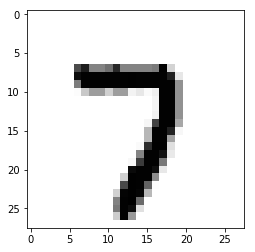

In [5]:
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size) # 55000 / 100

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()